<a href="https://colab.research.google.com/github/varad21-wg/python-/blob/main/mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Mobile Price Range Prediction**
Project Type- Classification

Contribution-single

Name- Varad wagh

# Project Summary -
The goal of the mobile price range prediction project is to create reliable prediction models that use machine learning techniques to estimate the price range of mobile devices based on their features and specifications. Data collection, preprocessing, model training and assessment, hyperparameter tuning, and model selection are all part of this process. The project's ultimate purpose is to provide significant insights and forecasts that can assist in educated pricing and marketing decisions in the competitive mobile device industry.

Important data about mobile devices, such as brand, model, display size, camera specs, CPU, storage, RAM, battery capacity, user reviews, and other pertinent information, is gathered to begin the project. This data is then preprocessed to handle missing values, feature engineering, as well as data normalization.

Using the preprocessed data, several machine learning methods, such as logistic regression, decision trees, random forests, K-nearest neighbors (KNN), and support vector machines (SVM), are then trained and evaluated. Accuracy, F1 score, precision, recall, and cross-validation are among the evaluation measures used for these models.

Hyperparameter tuning approaches may also be used to improve model performance by determining the best values for hyperparameters such as learning rate, regularisation strength, maximum tree depth, number of neighbors in KNN, and kernel type in SVM.

Based on the evaluation findings, the best-performing model(s) are chosen, which may then be used to produce price range forecasts for new mobile devices based on their features and characteristics. These forecasts can help companies with price strategy, sales forecasting, market segmentation, competitive analysis, and customer relationship management.

The project concludes with a summary of the findings, including the accuracy and performance of the chosen model(s), as well as recommendations for leveraging the prediction results for business goals. When evaluating the performance of the models, it is critical to examine more than simply accuracy.

Overall, the mobile price range prediction project uses machine learning approaches to deliver significant insights and forecasts for informed decision-making in the competitive mobile device business.


# Problem Statement
The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 5 classification algorithms (Logistic Regression, Decision Tree Classifier, Random Forest Clasifier, K-Nearest Neighbors, and Support Vecotr Machine) to predict the output. We will also compare the outputs. Let us get started with the project implementation.

# Define Your Business Objective?

The project's main goal is to offer insightful analysis and forecasts that can help decision-makers in the mobile device sector make well-informed choices on pricing and marketing tactics. Businesses are able to make educated judgments on their pricing strategy, sales forecasting, market segmentation, competitive analysis, and customer relationship management by precisely projecting the price range of mobile devices based on their features and specifications. By doing this, firms may increase their income and profitability while maintaining market competitiveness. The project's ultimate goal is to provide mobile device sector companies with a competitive edge by utilizing machine learning techniques to make more precise and data-driven judgments.

# *Let's Begin !*



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from numpy import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<ipython-input-11-646374fb2b9d>:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
#  Mount Drive and import Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/dataset mobile/train.csv'
df = pd.read_csv(file_path)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Dataset Rows & Columns count
row_count = len(df)
row_count

2000

In [ ]:
column_count = len(df.columns)
column_count

21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Information regarding type of columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Variables Description

battery_power- Battery Capacity in MAh

blue- Has Bluetooth or not

clock_speed- Speed at which microprocessor executes instructions

dual_sim- Has dual sim support or not

fc- Front camera magapixels

four_g- Has 4g or not

int_memory- Internal memory capacity

m_dep- mobile depth in cm

mobile_wt- Weight of mobile phone

n_cores- Number of cores in processor

pc- Primary camera magapixels

px_height- Pixels resolution height

px_width- Pixel resolution width

ram- Random Access Memory in MB

sc_h- Screen Height

sc_w- Screen Width

talk_time- Longest that a single battery can last over a call

three_g- Has 3g or not

touch_screen- phone have touchscreen or keypad

wifi- Has wifi or not

price_range- This is the target variable with a value of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)

# Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  uni_value = df[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


# Data Wrangling

In [ ]:
# Write your code to make your dataset analysis ready.
# We groupby battery and talktime:
phone_uses_time=df.groupby(['battery_power'])['talk_time'].max().reset_index()
phone_uses_time.sort_values('talk_time', ascending=False)
phone_uses_time.head(10)

,battery_power,talk_time
0,501,17
1,502,20
2,503,16
3,504,16
4,506,15
5,507,12
6,508,14
7,509,12
8,510,11
9,511,14


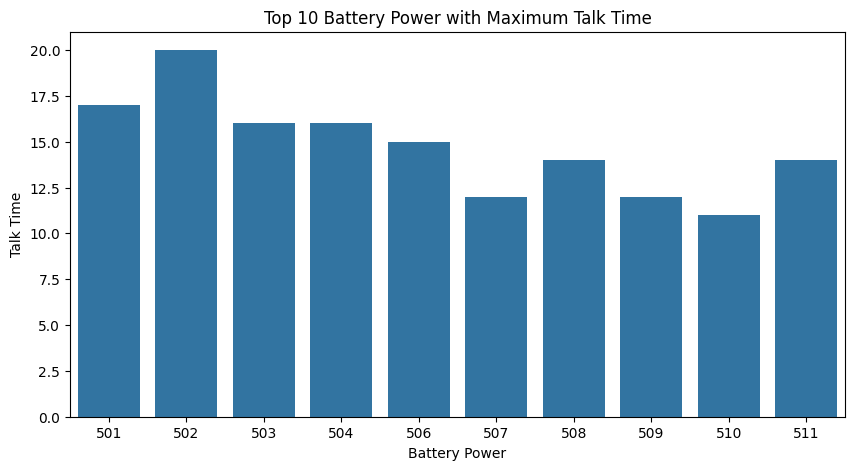

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar chart using seaborn
sns.barplot(x='battery_power', y='talk_time', data=phone_uses_time.head(10))

# Set the x-axis label
plt.xlabel('Battery Power')

# Set the y-axis label
plt.ylabel('Talk Time')

# Set the title of the chart
plt.title('Top 10 Battery Power with Maximum Talk Time')

# Show the chart
plt.show()

# What all manipulations have you done and insights you found?

This code categorizes the data in the df DataFrame by battery_power and calculates the maximum talk_time for each group. The result is then arranged in descending order of talk_time and the top ten rows are shown.

It organizes the data based on battery power and calculates the maximum talk time for each battery power value. The results suggest the top ten battery power and maximum talk times. A battery power of 502 mAh is related to the longest conversation duration of 20 hours. The insights of this research may be used to make judgments about mobile phone battery life, such as selecting a battery with a greater mAh rating for longer talk time.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart - 1

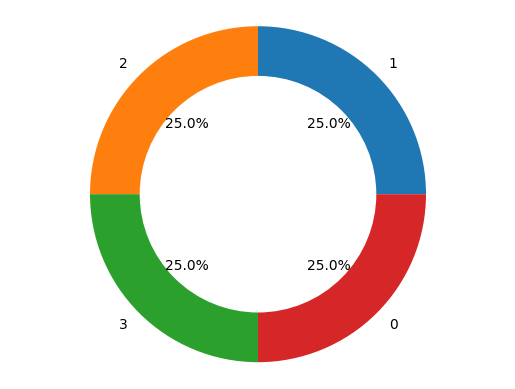

In [ ]:
# Chart - 1 visualization code
# Create a pieplot
price_range_counts = df['price_range'].value_counts()
data = price_range_counts.values

# Create a pie chart
labels = price_range_counts.index
plt.pie(data, labels=labels, autopct='%1.1f%%') # autopct we use because of percentage shown
plt.axis('equal')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# 1. Why did you pick the specific chart?

A pie chart depicts the portion relationship of your data. The area covered in a circle with different colours makes it easy to see how the percentages compare.

2. What is/are the insight(s) found from the chart?

All present equally that is 25 percent. so our target variable is equally distribute.


3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This chart's insights can assist in producing a strong business impact by providing information on the most important aspects for calculating the price range of mobile devices, as well as highlighting potential areas for differentiation and competitive advantage. There are no revelations that result in negative growth.

<Axes: xlabel='price_range', ylabel='Density'>

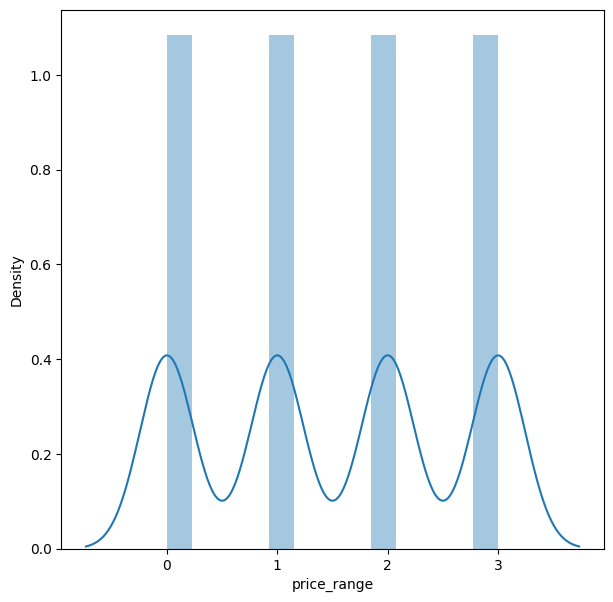

In [ ]:
# Chart - 3 visualization code
# Draw density chart to check distribution of the Data and our Dependent variable is 'price range'
plt.figure(figsize=(7,7))
sns.distplot(df['price_range'])

1. Why did you pick the specific chart?

Distribution plots evaluate the distribution of sample data graphically by comparing the actual distribution of the data to the theoretical values predicted provided a specific distribution

2. What is/are the insight(s) found from the chart?

We see that there are equal distribution between all the data in target variable

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

If it is not distributed evenly, it has a favorable influence on our model and business objectives, therefore we should convert it to log10 or square root.

Chart - 3

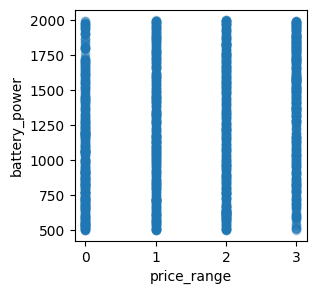

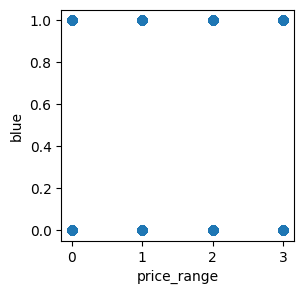

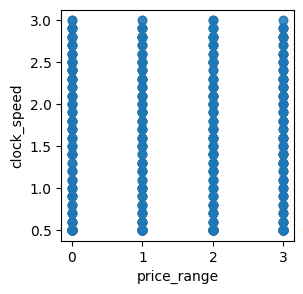

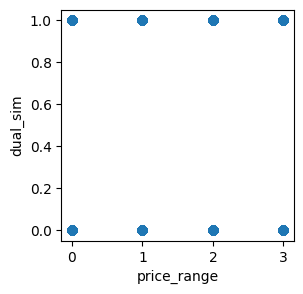

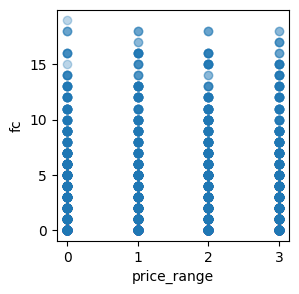

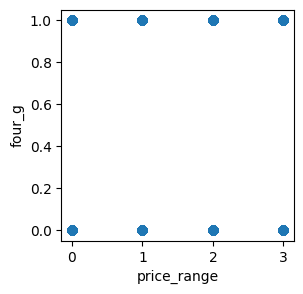

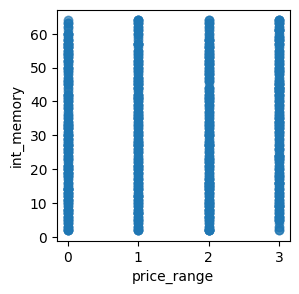

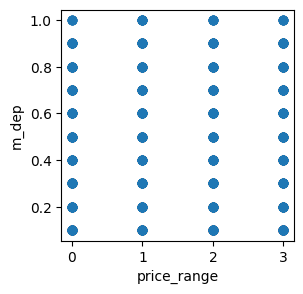

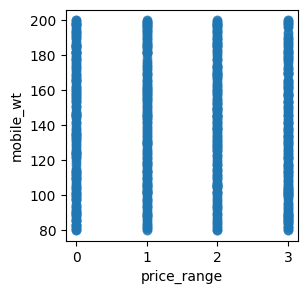

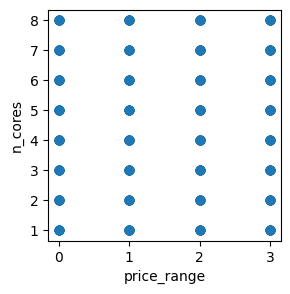

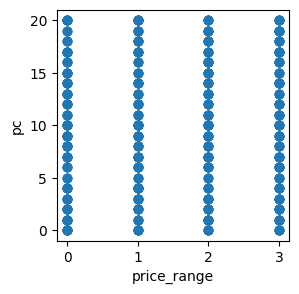

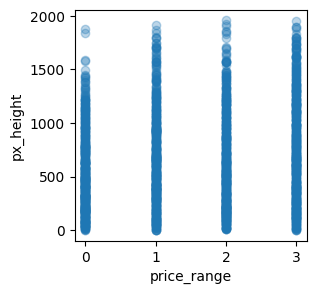

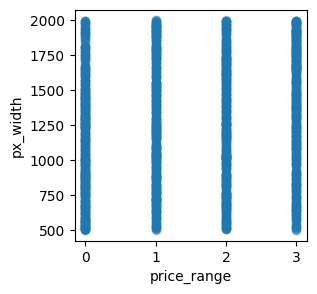

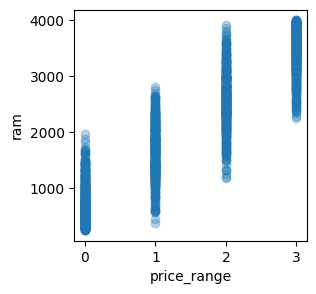

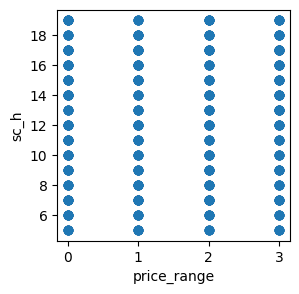

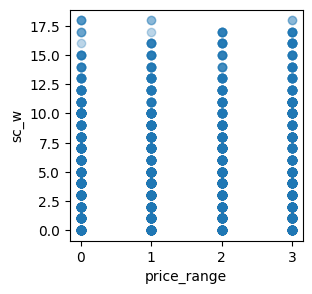

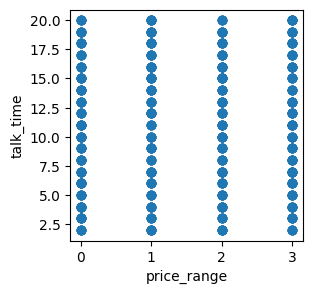

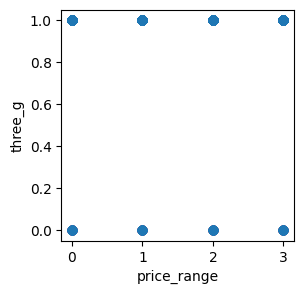

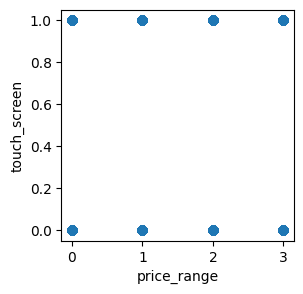

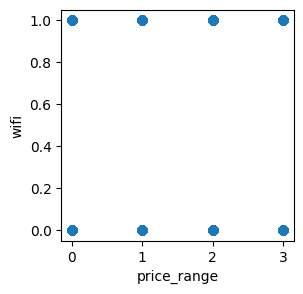

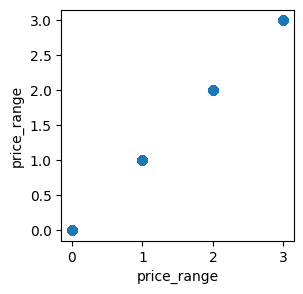

In [ ]:
# Chart - 4 visualization code
# Function to show the realtion between all the independent variable to dependent variable
def relation(independent_variable, other_variables, dataframe):
    for col in other_variables:
        fig = plt.figure(figsize=(3, 3))
        plt.scatter(dataframe[independent_variable], dataframe[col], alpha=0.3)
        plt.xlabel(independent_variable)
        plt.ylabel(col)
        plt.show()
other_variables = df.columns[:].tolist() # select columns 1-10 as other variables
independent_variable = 'price_range'

relation(independent_variable, other_variables, df)

1. Why did you pick the specific chart?
The scatter plot's aim is to show what happens to one variable when another variable is modified. The scatter plot is used for testing a theory about the two variables of the test.

2. What is/are the insight(s) found from the chart?
Battery is directly related to price range as we increase the power of battery price is also increases.

Bluetooth and price range have no connectivity


Clock Speed is directly proportional to price range. Because to execute multiple operation at same time we need clock speed so how fastest is the mobile price is accordingly high.

Sim ports have no connection with price range.

Front Camera also we called is also dependent on price range. because camera lens is costly so as to increse the camera quality prices increases.

Mobile Network like 2g, 3g, and 4g have no connection with Price range.

Internal memory is also directly proportional to price range. because if we need more internal space more advanced chipset is required which is costly.

Mobile dimensions like Mobile depth, Mobile weight is also directly proportional to price.

Cores id directly proportal to speed and speed is directly proportional to price so that cores is also directly proportional to price.

As like front camera back camera or primary camera its hight and width pixels are all relate the quality and quality need price.

Ram help to increase the speed and also dependent on price range.

Hight and Width of screen size is also comes in dimension it is also dependent on price.

Talktime is related to battery. How much the battery is good we will se good talktime and battery depends on cost.

touchscreen or keypad or wifi is not dependent on mobile.








3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Battery, clock speed, front camera, internal memory, screen size, and RAM insights are likely to have a positive impact on the business because they are favorably associated with the price range of mobile phones.

Bluetooth, SIM ports, mobile networks, talk time, touchscreen/keypad/wifi insights are unlikely to have significant effects on the business because they have no connection with the price range..

Chart - 4

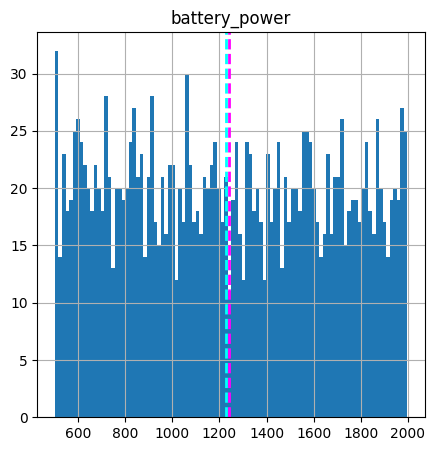

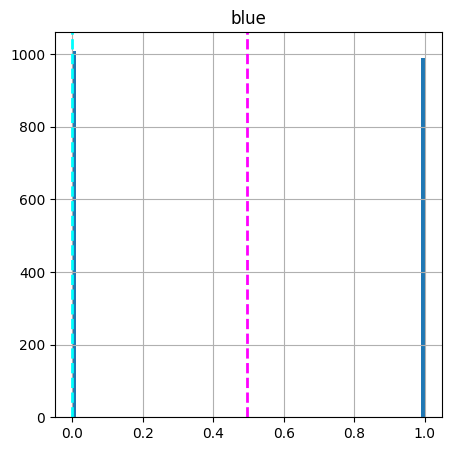

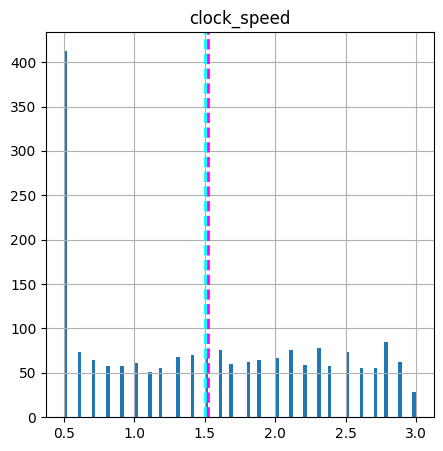

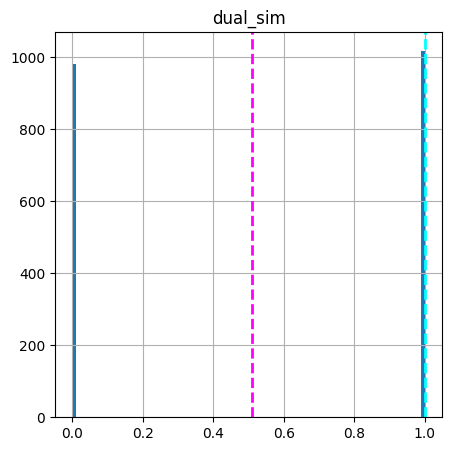

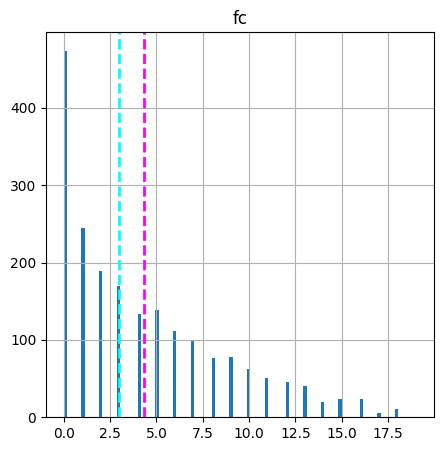

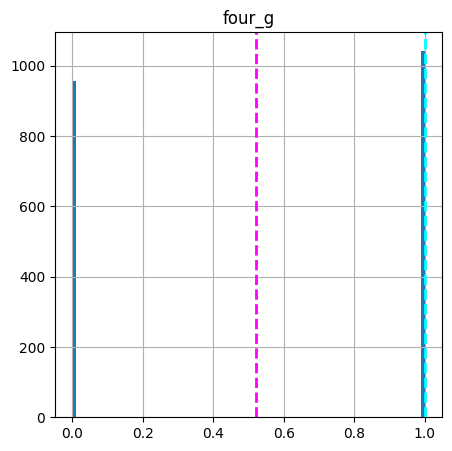

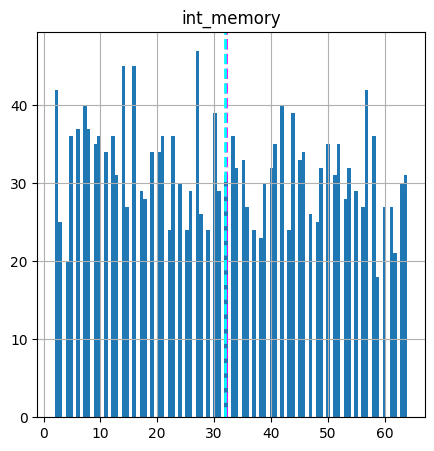

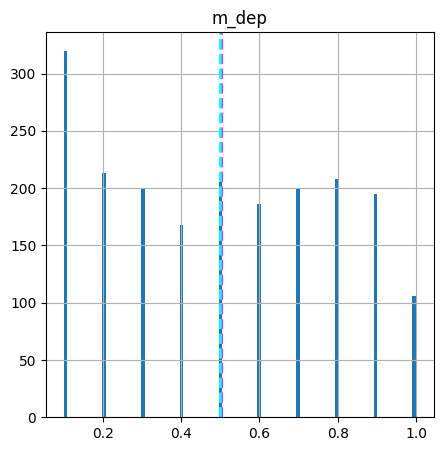

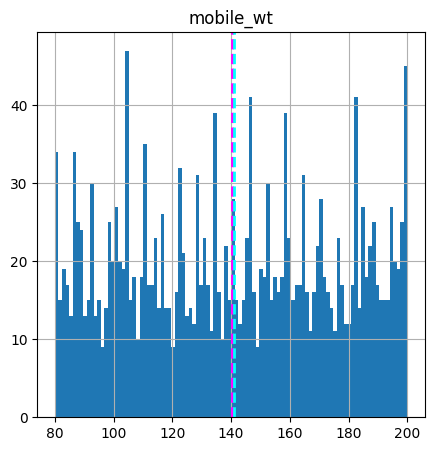

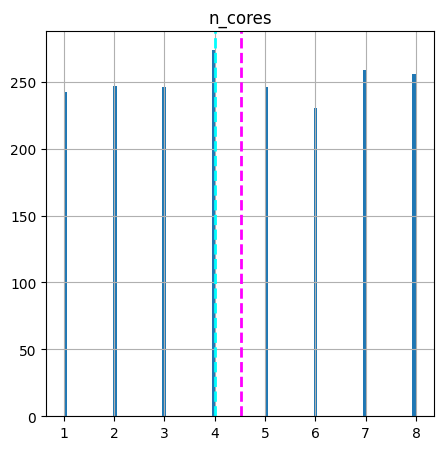

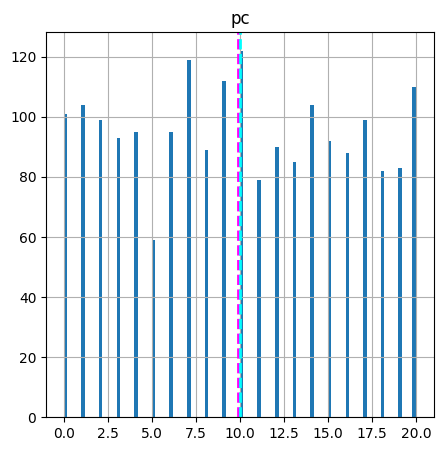

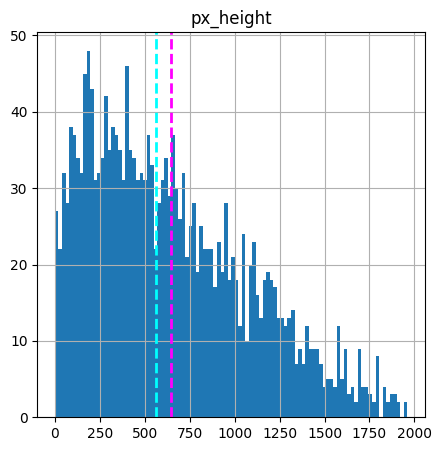

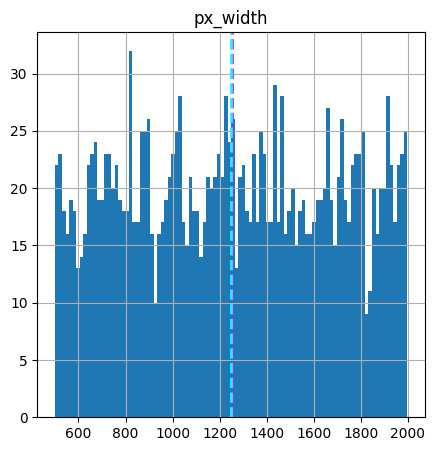

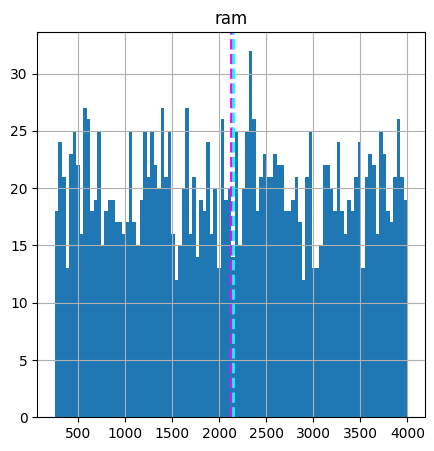

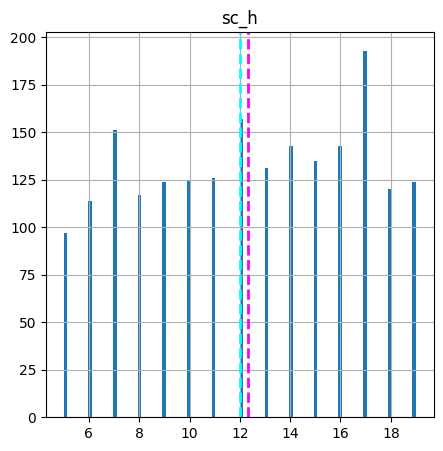

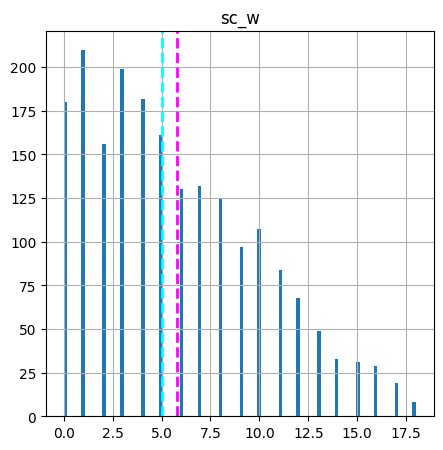

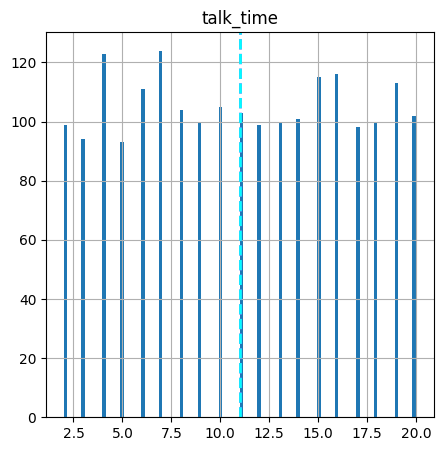

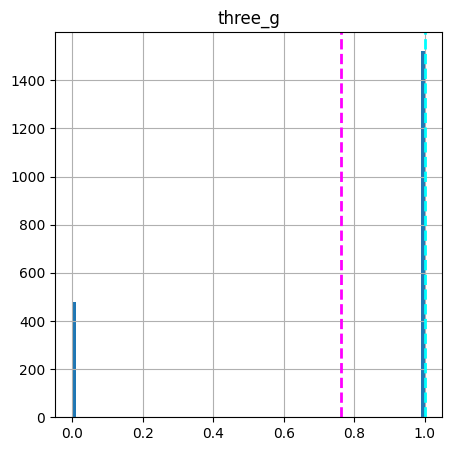

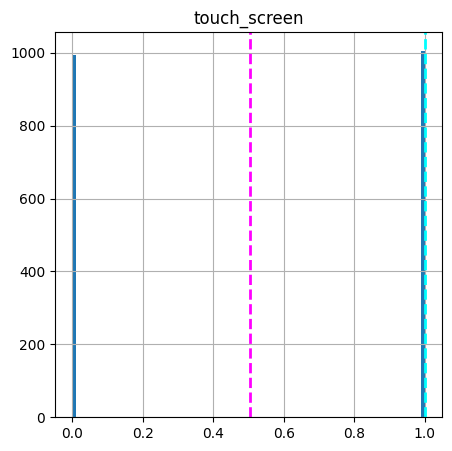

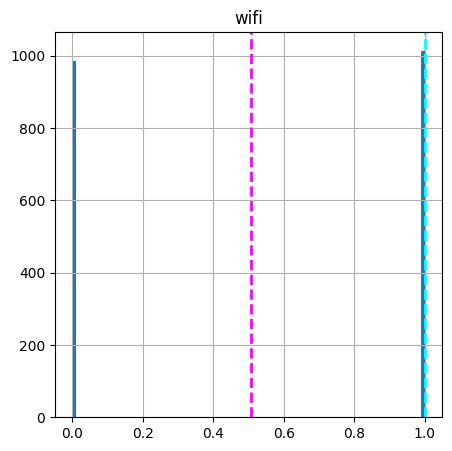

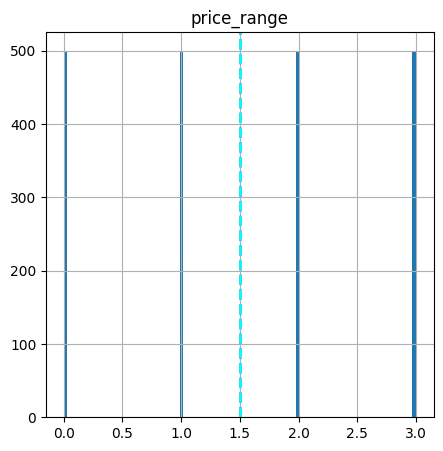

In [ ]:
# Chart - 5 visualization code
# Naming all the numerical columns present in dataset
num_col=df.describe().columns
for column in num_col[:]: # this chart shows the mean and median of each numeric values
   fig = plt.figure(figsize=(5, 5))
   ax = fig.gca()
   feature = df[column]
   feature.hist(bins=100, ax = ax)
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
   ax.set_title(column)
plt.show()

1. Why did you pick the specific chart?

A histogram is a graph that depicts the frequency distribution of a few data points from a single variable. a graph that shows the distribution of the values of a numeric variable as a sequence of bars. this also gives us mean and median value of all numerical columns.

2. What is/are the insight(s) found from the chart?

We discovered the average number at which mobile devices are often developed, such as their batteries. According to the chart, mobile batteries are typically built between 1000 and 1500.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This give the positive impact on our business. And provide specific result to mean and median 'megenta' line represent the mean and 'cyan' color line represent the median line.

chart - 5

In [ ]:
# Chart - 2 visualization code
# Correlation between all the numerical data
correlation = df.corr()
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

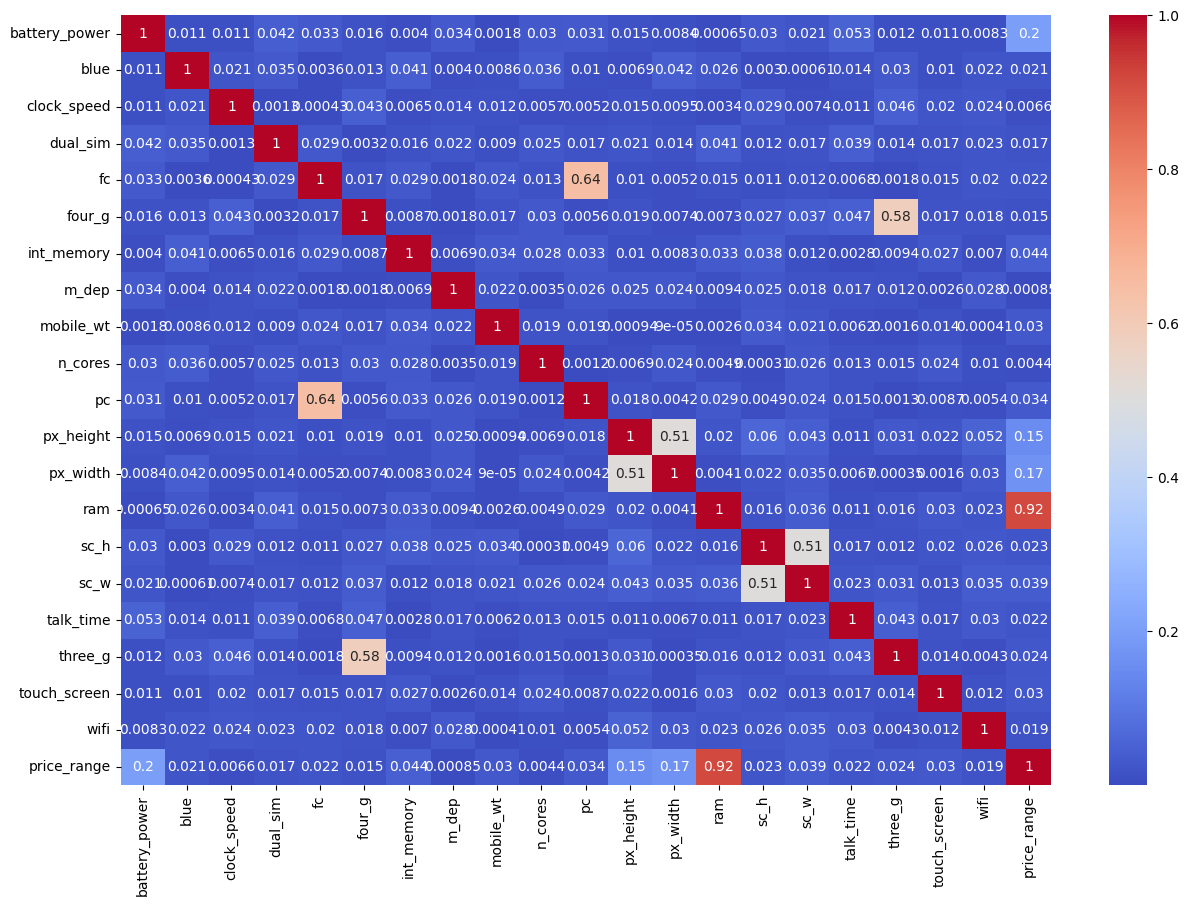

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(correlation), annot=True,cmap="coolwarm")

1. Why did you pick the specific chart?

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.A heat map is a quick visual overview of information. More detailed heat maps help the user in understanding complicated data sets.

2. What is/are the insight(s) found from the chart?

The diagonal line is completely red because it represents the correlation of each feature with itself, which is always equal to 1.
The highest correlation is observed between the features 'ram' and 'price_range' with a correlation coefficient of 0.92, which indicates a moderate positive correlation between these two features.
There is also a moderate positive correlation between 'pc' and 'fc' features with a correlation coefficient of 0.64.
The feature 'four_g' and 'three_g' have a moderate correlation with with a correlation coefficient of 0.58.
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The correlation heatmap shows that the 'ram' and 'price_range' features have a strong positive correlation, which can be useful for pricing strategy. However, there are also some moderate positive correlations between features such as 'pc' and 'fc', and 'four_g' and 'three_g', which may lead to multicollinearity issues in modeling. Overall, the insights can be valuable for decision-making, but further analysis and modeling are needed to fully understand their impact

# 5. Feature Engineering & Data Pre-processing

1. Handling Missing Values
No, null value or missing value present in dataset we already checked so no handling required.

2. Handling Outliers

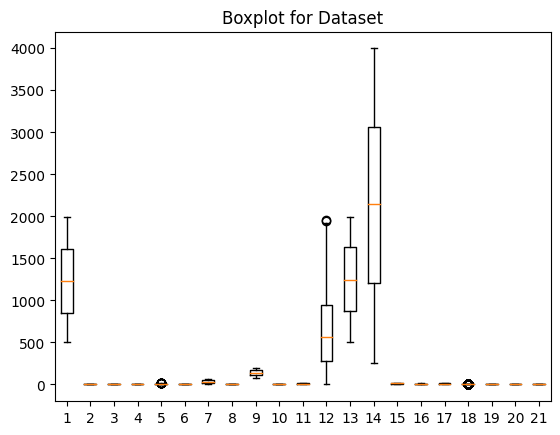

In [ ]:
# Handling Outliers & Outlier treatments
# Create a boxplot from your dataset to check for Outliers
plt.boxplot(df)

# Set a title for the plot
plt.title('Boxplot for Dataset')

# Show the plot
plt.show()

In [ ]:
# Z score method to remove outliers present in dataset
df_1=df[(np.abs(stats.zscore(df))<2).all(axis=1)] # take z-score value less then

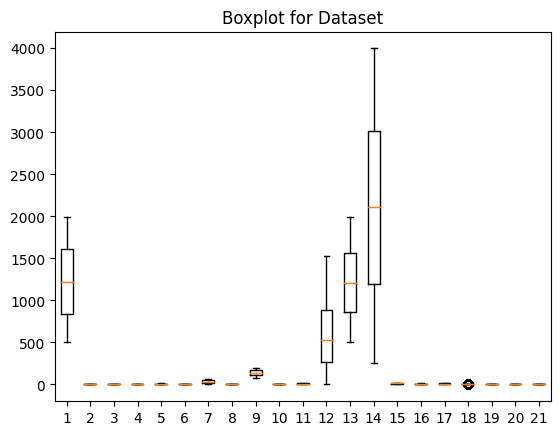

In [ ]:
# Agin checking weather outlier is removed or not by plotting box plot chart
plt.boxplot(df_1)

# Set a title for the plot
plt.title('Boxplot for Dataset')

# Show the plot
plt.show()

What all outlier treatment techniques have you used and why did you use those techniques?

yes, outlier is present in the 12th column of dataset. So we do z-score method to remove outlier. Generally this technique is good for removing it that is why we also used it. we took z-score less then 2 so it removed. we also tried with z-score 3 but by this score it is not removed.

3. Categorical Encoding


In [ ]:
df1=df.copy() # copy or original dataset so that original dataset does not affected

In [ ]:
# Feature creation: three_g and four_g
df1['mobile_network']=df1['three_g']+df1['four_g']
df1['mobile_network'].replace(2, '4g', inplace=True)   # replace the 2 with 4g
df1['mobile_network'].replace(1, '3g', inplace=True)   # replace the 1 with 3g
df1['mobile_network'].replace(0, '2g', inplace=True)   # replace the 0 with 2g

df1.drop('three_g', axis=1, inplace=True)   # Drop the original column
df1.drop('four_g', axis=1, inplace=True)    # Drop the original column


# Encode your categorical columns of Mobile Network
df1['dummy_mobile_network']=np.where(df1['mobile_network']=='2g', 1, 0)
df1['dummy_mobile_network']=np.where(df1['mobile_network']=='3g', 1, 0)
df1['dummy_mobile_network']=np.where(df1['mobile_network']=='4g', 1, 0)
df1.drop('mobile_network', axis=1, inplace=True)   # drop the feature Mobile Network
df1['dummy_mobile_network']

0       0
1       1
2       1
3       0
4       1
       ..
1995    1
1996    0
1997    1
1998    1
1999    1
Name: dummy_mobile_network, Length: 2000, dtype: int64

What all categorical encoding techniques have you used & why did you use those techniques?

This code utilizes "dummy variable encoding" as a form of categorical encoding. The mobile_network feature is first translated to labels of "2g", "3g", and "4g", and then encoded using dummy variables to construct three new binary features (dummy_mobile_network_2g, dummy_mobile_network_3g, dummy_mobile_network_4g) that reflect the existence or absence of each mobile network type.

# 4. Feature Manipulation & Selection
1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Feature creation: fc^& pc
df1['front_camera_megapixel']=df1['fc'] + df1['pc']
df1.drop('fc', axis=1, inplace=True)     # drop the original column
df1.drop('pc', axis=1, inplace=True)     # drop the original column

# Feature creation: ram & price_range
df1['ram_price'] = df1['ram'].astype(str) + '_' + df1['price_range'].astype(str)
df1.drop('ram', axis=1, inplace = True)   # drop the original column

# Feature Creation: px_width & px_height
df1['total_pixel']=df1['px_height']*df1['px_width']
df1.drop('px_height',axis=1, inplace=True)    # drop the original column
df1.drop('px_width', axis=1, inplace=True)    # drop the original column

# feature cration: sc_w and sc_h
df1['screen_size']=df1['sc_h']*df1['sc_w']
df1.drop('sc_h', axis=1, inplace=True)  # drop the original column
df1.drop('sc_w', axis=1, inplace=True)  # drop the original column

In [ ]:
#  checking Correlation between all the numerical data by heatmap
plt.figure(figsize=(12,8))
correlation = df1.corr()
df1.corr()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,talk_time,touch_screen,wifi,price_range,dummy_mobile_network,front_camera_megapixel,ram_price,total_pixel,screen_size
battery_power,1.000000,0.011252,0.011482,-0.041847,-0.004004,0.034085,0.001844,-0.029727,0.052510,-0.010516,-0.008343,0.200723,0.015665,0.035438,-0.000632,0.018442,-0.024589
blue,0.011252,1.000000,0.021419,0.035198,0.041177,0.004049,-0.008605,0.036161,0.013934,0.010061,-0.021863,0.020573,0.013443,-0.004729,0.026351,-0.015513,-0.005565
clock_speed,0.011482,0.021419,1.000000,-0.001315,0.006545,-0.014364,0.012350,-0.005724,-0.011432,0.019756,-0.024471,-0.006606,-0.043073,-0.003560,0.003442,-0.009854,-0.006103
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.015679,-0.022142,-0.008979,-0.024658,-0.039404,-0.017117,0.022740,0.017444,0.003187,-0.024344,0.041070,-0.017730,-0.015703
int_memory,-0.004004,0.041177,0.006545,-0.015679,1.000000,0.006886,-0.034214,-0.028310,-0.002790,-0.026999,0.006993,0.044435,0.008690,-0.034685,0.032815,0.015263,0.022887
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.006886,1.000000,0.021756,-0.003504,0.017003,-0.002638,-0.028353,0.000853,-0.001823,0.016020,-0.009433,0.025138,-0.021453
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,-0.034214,0.021756,1.000000,-0.018989,0.006209,-0.014368,-0.000409,-0.030302,-0.016537,0.022909,-0.002583,-0.006036,-0.026375
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.028310,-0.003504,-0.018989,1.000000,0.013148,0.023774,-0.009964,0.004399,-0.029706,-0.006891,0.004868,0.001245,0.021618
talk_time,0.052510,0.013934,-0.011432,-0.039404,-0.002790,0.017003,0.006209,0.013148,1.000000,0.017196,-0.029504,0.021859,-0.046628,0.006259,0.010821,-0.010729,-0.026502
touch_screen,-0.010516,0.010061,0.019756,-0.017117,-0.026999,-0.002638,-0.014368,0.023774,0.017196,1.000000,0.011917,-0.030411,0.016758,-0.012404,-0.030455,0.017036,0.008131


<Figure size 1200x800 with 0 Axes>

<Axes: >

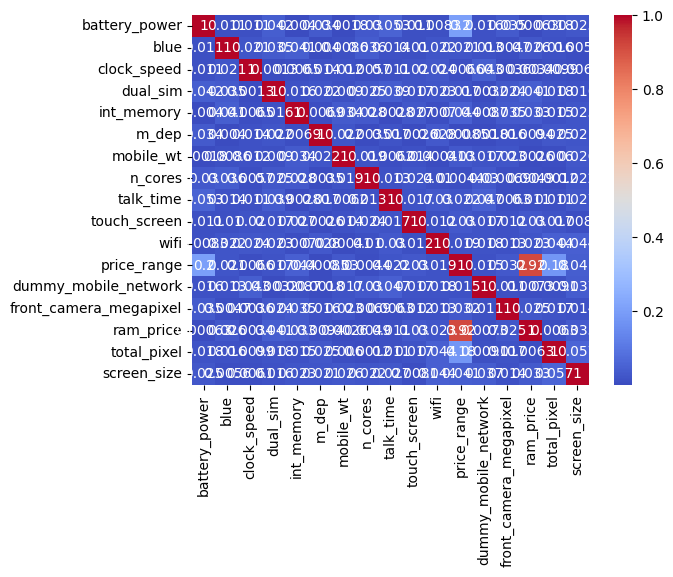

In [ ]:
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

So we can see that we have already dealt with all of the multicollinearity in the dataset.

Which all features you found important and why?

Battery power and price range appear to have the highest correlation coefficient, according to the presented correlation matrix, indicating a strong positive relationship between these factors. Therefore, it is possible that battery life plays a significant role in determining a mobile phone's price range.

Additionally, there are some minor connections between price range and features like RAM, front camera megapixels, and screen size. These elements are frequently used as markers of a mobile phone's functionality and capabilities, which might affect its cost.

Although to a lesser extent than the factors mentioned above, other aspects including the availability of a dual sim, weight, and the number of cores also exhibit some link with a price range.

# 2. Data Transformation, Scaling, Splitting

In [ ]:
# Make list for independent variable
dependent_variable= 'price_range'
independent_variable=list(set(df1.columns.tolist()) - {dependent_variable})
independent_variable

['touch_screen',
 'dummy_mobile_network',
 'front_camera_megapixel',
 'wifi',
 'screen_size',
 'talk_time',
 'total_pixel',
 'battery_power',
 'mobile_wt',
 'clock_speed',
 'dual_sim',
 'int_memory',
 'ram_price',
 'm_dep',
 'blue',
 'n_cores']

In [ ]:
# Create the data of independent variables
X = df1[independent_variable].values

# Create the dependent variable data
y = df1[dependent_variable].values

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) # Splitting data into train and test model with ratio(80:20)
print(X_train.shape)
print(X_test.shape)

(1600, 16)
(400, 16)


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) # Splitting data into train and test model with ratio(80:20)
print(X_train.shape)
print(X_test.shape)

(1600, 16)
(400, 16)


What data splitting ratio have you used and why?

we used general splitting 80:20. because For machine learning applications, an 80/20 data-splitting ratio is a common and efficient option for dividing a dataset into a training set (80%) and a testing set (20%). This makes it possible to utilize a sufficient amount of data to train the model while still keeping a sufficient amount of data available to assess the model's performance. This ratio is a common and typically useful option, especially with larger datasets.

3. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

No, Data is not imbalanced because the dataset is balanced and the data is equally distributed throughout the classes, making it perfect for machine learning applications. Without the need for specialized methods to solve class imbala

# 7. ML Model Implementation

In [ ]:
# create function for performing the implementation part in all the algorithm it save time as well space.
def evaluate(classifier, X_train, X_test, y_train, y_test, param_grid, cv=3):

    '''create a function name Evaluate in which 7 argument we have taken. first is classifier this is used to implement the algorithm, X_train, X_test, y_train, and y_test are
     the data split parameters, param_grid is basically for project the tunning hyperparameters by grid search cross validation technique and last is cv which is cross validation
     folds who give accuracy score.'''

    # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(classifier, param_grid, cv=cv) # use grid search hyperparameters to find the best tunning and accuracy of the model
    grid_search.fit(X_train, y_train)  # fit the data into grid search
    best_params = grid_search.best_params_ # finidng the best hyperparameter for every classifiers

    # Train and evaluate the classifier with best hyperparameters
    classifier.set_params(**best_params) # here the parameter which comes out from the grid search set it to find out the accuracy
    classifier.fit(X_train, y_train) # fit the data into algorithms
    y_pred_train = classifier.predict(X_train) # implement algorithm on x_train and comes out y_prd_train
    y_pred_test = classifier.predict(X_test)   # implement algorith on X_test and comes out y_pred_test

    # Calculate evaluation metrics
    metrics = {} # creaty an empty set name as matrics

    # here to find accuracy score from y_train and y_pred_train and append to metrics set
    metrics['Accuracy_Score'] = accuracy_score(y_train, y_pred_train)

    # here to find the Precision score from y_test and y_pred_test and average=weighted gives score weighted by the number of samples in each class.
    metrics['Precision'] = precision_score(y_test, y_pred_test, average='weighted')

    # here to find Recall score from y_test, y_pred_test and same average= weighted
    metrics['Recall'] = recall_score(y_test, y_pred_test, average='weighted')

    # here to find the F1 score from y_test, y_pred_test and same average parameter is weighted
    metrics['F1 Score'] = f1_score(y_test, y_pred_test, average='weighted')

    # Confusion matrix from y_test, y_pred_test.It is a table that displays the true positive, true negative, false positive, and false negative predictions made by a model.
    confusion = confusion_matrix(y_test, y_pred_test)
    metrics['Confusion'] = confusion

    # Perform Cross-Validation
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv)  # Perform CV on training data. cv is basically the number of folds taken by algoritm for calculation the accuracy.
    metrics['CV_Accuracy_Scores'] = cv_scores

    # Print evaluation metrics
    for metric_name, metric_value in metrics.items(): # create a small loop which iterate from matrics for each values.
        print(f"{metric_name}: {metric_value}") # to print

    # Plot confusion matrix heatmap
    class_labels = sorted(set(y_test))
    cm_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return metrics

# Logistic Regression

In [ ]:
LR = LogisticRegression(fit_intercept=True, max_iter=10000) # we included intercept term by taking fir_intercept as true and allow maximum iteration upto 10000 it help high accuracy

'''C and Penalty both are the regulizer that decide how much the data regularize
so hear i take general value by which dataset is not going to underfir or overfit and penalty both l1 i.e. Lasso and l2 i.e. Ridge'''
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}   # for tunning by grid hyperparameter

evaluate(LR, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3) # implement the function evaluate

NameError: name 'X_train_scaled' is not defined

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a statistical method for binary classification problems with a categorical dependent variable. Based on the values of the independent variables, it calculates the probability of the dependent variable getting a specific value. It works by applying a logistic function to change the linear regression equation and limiting the output to between 0 and 1. As a result, it works well for modeling probabilities and predicting the probability of a binary event.

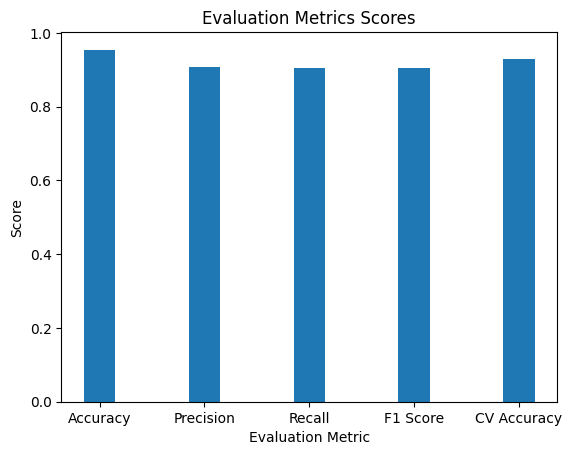

In [ ]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.9542151162790697, 0.9086746490120178, 0.9043478260869565, 0.9053604760305527, np.mean([0.93464052, 0.92810458, 0.92358079])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# Decision Tree Classifier

Accuracy_Score: 0.789375
Precision: 0.757346223284743
Recall: 0.7675
F1 Score: 0.7583932192822583
Confusion: [[ 91   4   0   0]
 [ 16  61  15   0]
 [  0  25  51  23]
 [  0   0  10 104]]
CV_Accuracy_Scores: [0.74719101 0.76923077 0.79362101]


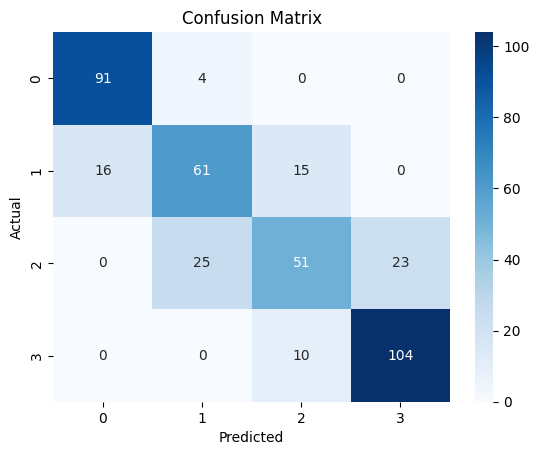

{'Accuracy_Score': 0.789375,
 'Precision': 0.757346223284743,
 'Recall': 0.7675,
 'F1 Score': 0.7583932192822583,
 'Confusion': array([[ 91,   4,   0,   0],
        [ 16,  61,  15,   0],
        [  0,  25,  51,  23],
        [  0,   0,  10, 104]]),
 'CV_Accuracy_Scores': array([0.74719101, 0.76923077, 0.79362101])}

In [ ]:
# Visualizing evaluation Metric Score chart
DTR_classifier = DecisionTreeClassifier(random_state=1) # implement the classification algorith with randomness value 1

'''these all are hyperparameter for tuning like maxdepth tell how much upto it grow.
leaf nodes are the end nodes from which no other brach comes out,
criteria entropy and gini both for impurity.'''

param_grid={'max_depth':[3,5,7], 'criterion':['gini', 'entropy'], 'max_leaf_nodes':[2,4,6]}
evaluate(DTR_classifier, X_train, X_test, y_train, y_test, param_grid, cv=3) # implement function evaluate

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A Decision Tree Classifier is a type of machine learning algorithm used for classification problems. Based on the training data, it constructs a tree-like model in which each node represents a feature or attribute and each branch represents a decision or rule based on that feature. The algorithm's purpose is to build a tree that accurately predicts the class label of the input information.

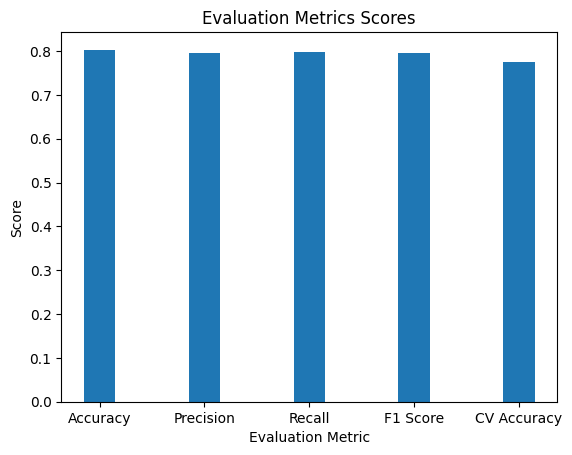

In [ ]:
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.8030523255813954, 0.7950707593034123, 0.7971014492753623, 0.7956841702897494, np.mean([0.77559913, 0.75599129, 0.79039301])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# Random Forest Classifier

Accuracy_Score: 0.958125
Precision: 0.8565956399512309
Recall: 0.8575
F1 Score: 0.8569362516000634
Confusion: [[ 91   4   0   0]
 [  5  74  13   0]
 [  0  16  73  10]
 [  0   0   9 105]]
CV_Accuracy_Scores: [0.85205993 0.8424015  0.85178236]


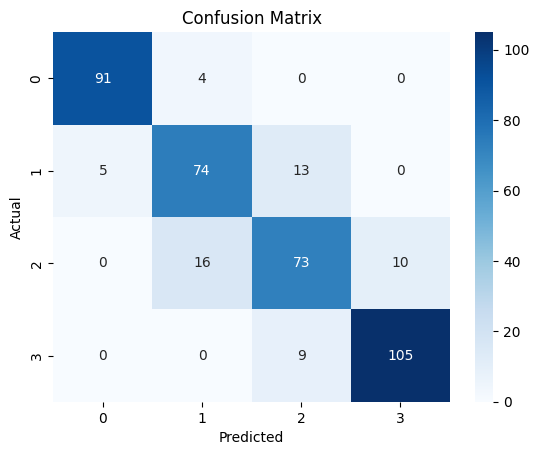

{'Accuracy_Score': 0.958125,
 'Precision': 0.8565956399512309,
 'Recall': 0.8575,
 'F1 Score': 0.8569362516000634,
 'Confusion': array([[ 91,   4,   0,   0],
        [  5,  74,  13,   0],
        [  0,  16,  73,  10],
        [  0,   0,   9, 105]]),
 'CV_Accuracy_Scores': array([0.85205993, 0.8424015 , 0.85178236])}

In [ ]:
RFR_Classifier = RandomForestClassifier() # implement the algorith

'''here i just took 2 hyperparameter for tuning that is n_estimator this basically determine the number of base learners and
max_depth tell how much you can grow upto'''
param_grid = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}

evaluate(RFR_Classifier, X_train, X_test, y_train, y_test, param_grid, cv=3) # IMplement the function evaluate

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Classifier is a machine learning algorithm that uses a combination of decision trees to make predictions. It creates multiple decision trees and aggregates their results to improve accuracy and reduce overfitting. The algorithm randomly selects subsets of features to use in each decision tree and allows them to vote on the final prediction. This method helps to avoid bias and increase generalization performance

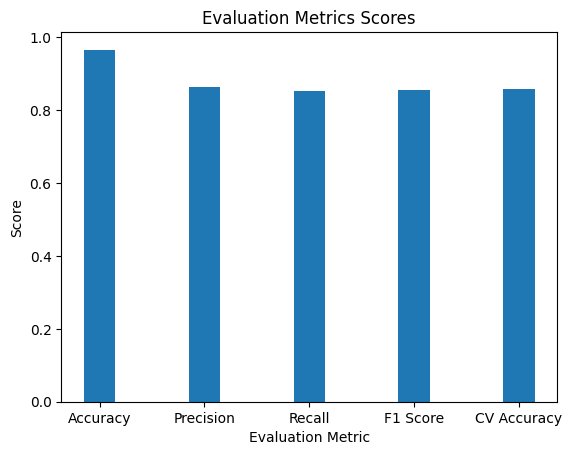

In [ ]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.965843023255814, 0.8646868046812217, 0.8521739130434782, 0.8549822661078635, np.mean([0.86056645, 0.85185185, 0.8580786])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier() # implement algorithm.

# Number of neighbors, Weight function used in prediction, Power parameter for Minkowski distance metric
param_grid = {'n_neighbors': [3, 5, 7],  'weights': ['uniform', 'distance'],  'p': [1, 2]}

evaluate(knn, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3)

NameError: name 'X_train_scaled' is not defined

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Nearest Neighbours (KNN) is a supervised learning technique that may be used for classification and regression. It operates by locating the k-nearest points in the training set to the new data point and assigning them to the class with the greatest number of k-nearest neighbors. KNN is simple to understand and apply, and it is effective for simple classification problems.

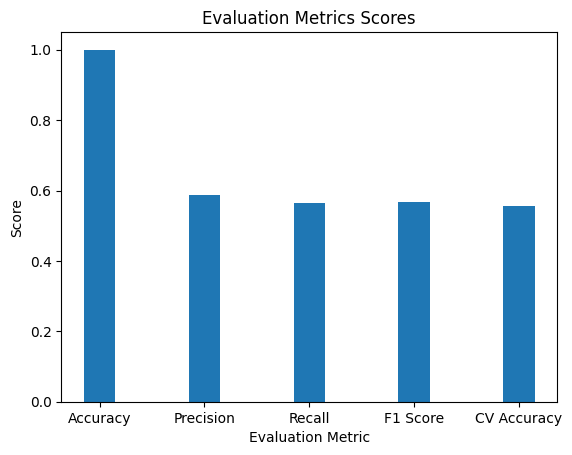

In [ ]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [1.0, 0.587613614475431, 0.5652173913043478, 0.5660178530845097, np.mean([0.51198257, 0.58169935, 0.57641921])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# Support Vector Machine (SVM)

In [ ]:
SVM_classifier = SVC() # Implement the algorithm

# K-Kernel is basically help to find out best hyperplane to seperate classes, C-Penalty parameter of the error term help to maintain data optimal fit
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

evaluate(SVM_classifier, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3) # implement function evalute

NameError: name 'X_train_scaled' is not defined

without using scaling data our accuracy is very less because some column have very diffrent values that's why we use scaled data in SVM

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Machine (SVM) is a supervised learning algorithm that can be used for both classification and regression tasks. It finds the best boundary that separates the data points into different classes, by maximizing the distance between the boundary and the closest data points.

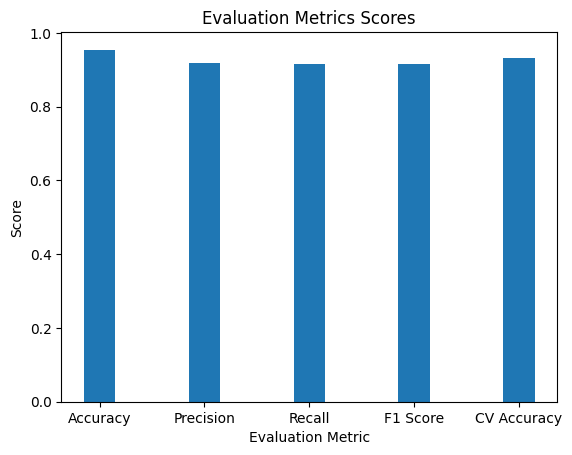

In [ ]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.9542151162790697, 0.9192464811035428, 0.9159420289855073, 0.9166958942552748, np.mean([0.93464052, 0.92592593, 0.93231441])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# Visualizing the accuracy of all classifier models

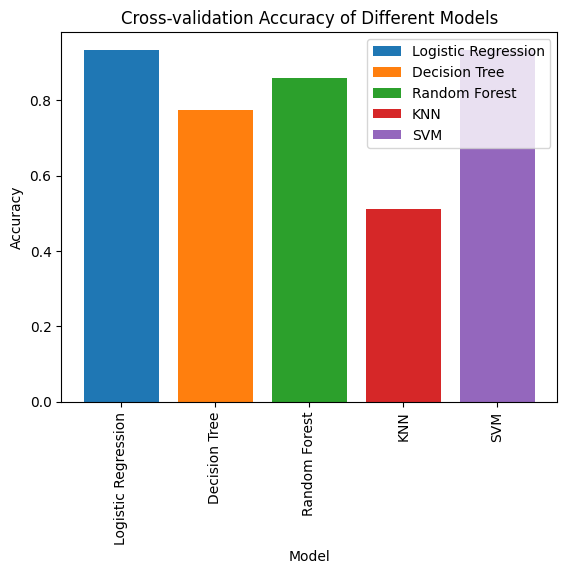

In [ ]:
# create a bar chart to show the cross=validation accuracy
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'] # all the models name
cv_accuracy_scores_model_a = [0.93464052, 0.92810458, 0.92358079]    # cross-validation sccuracy score values which are find out from algorithm
cv_accuracy_scores_model_b = [0.77559913, 0.75599129, 0.79039301]
cv_accuracy_scores_model_c = [0.86056645, 0.85185185, 0.8580786]
cv_accuracy_scores_model_d = [0.51198257, 0.58169935, 0.57641921]
cv_accuracy_scores_model_e = [0.93464052, 0.92592593, 0.93231441]

# Create a list of accuracy scores for each model
cv_accuracy_scores = [cv_accuracy_scores_model_a, cv_accuracy_scores_model_b, cv_accuracy_scores_model_c, cv_accuracy_scores_model_d, cv_accuracy_scores_model_e]

# Create a bar chart for each model
for i in range(len(model_names)):
    plt.bar(i, cv_accuracy_scores[i][0], label=model_names[i])

# Set x-axis labels and title
plt.xticks(range(len(model_names)), model_names, rotation=90) # print all the cv accuracy score into chart
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy of Different Models')

plt.legend()
plt.show()

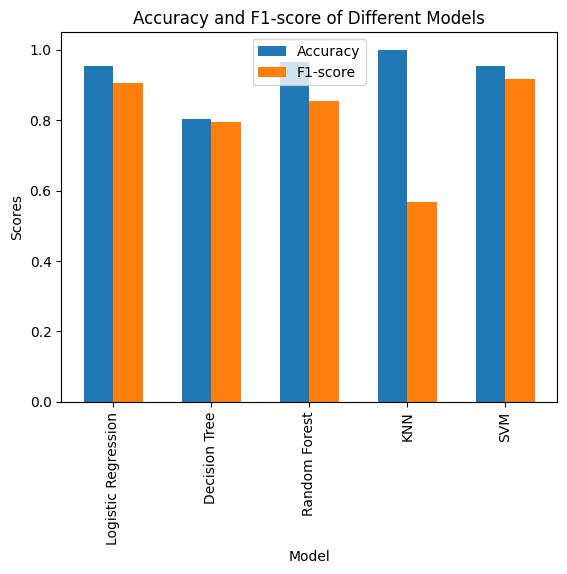

In [ ]:
# Define model names and accuracy scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracy_scores = [0.9542151162790697, 0.8030523255813954, 0.965843023255814, 1.0, 0.9542151162790697] # accuracy score which are found with the help of algorithm

# Define F1-scores for each model
f1_scores = [0.9053604760305527, 0.7956841702897494, 0.8549822661078635, 0.5660178530845097, 0.9166958942552748]  # F1 score which are found with the help of algorithm

# Set width of bars
bar_width = 0.3 # I took general width of a bar

# Set positions for the bars
bar_positions = list(range(len(model_names)))

# Create bar chart for accuracy scores
plt.bar(bar_positions, accuracy_scores, width=bar_width, label='Accuracy')

# Create bar chart for F1-scores
plt.bar([bp + bar_width for bp in bar_positions], f1_scores, width=bar_width, label='F1-score') # bp is basically the bar position

# Set x-axis labels and title
plt.xticks([bp + bar_width/2 for bp in bar_positions], model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Accuracy and F1-score of Different Models')

# Add legend
plt.legend()

plt.show()

1. Which Evaluation metrics did you consider for a positive business impact and why?

# According to us, SVM is the best metrics for positive business impact because The SVM algorithm achieved the highest accuracy among all the models, which means it is able to correctly classify the most number of instances in the dataset. Therefore, it can be a good choice for a business application where accurate classification is important.

# Business Objective

The business objective for mobile price range prediction can vary depending on the specific context and goals of the business. Here are some possible business objectives for mobile price range prediction:

Pricing Strategy: The business may want to optimize its pricing strategy by accurately predicting the price range of mobile devices. This can help the business determine the appropriate pricing levels for different types of mobile devices, taking into consideration factors such as production costs, competition, and customer preferences.

Sales Forecasting: Accurate prediction of mobile price range can help the business in forecasting sales and revenue, as pricing is a key factor that affects customer purchasing decisions. By understanding the price range of mobile devices that are likely to sell well, the business can plan its inventory levels, production, and marketing efforts accordingly.

Market Segmentation: Mobile price range prediction can also aid in market segmentation, allowing the business to identify and target different customer segments based on their price preferences. For example, the business can develop different marketing strategies for budget-conscious customers who are interested in lower-priced mobile devices versus premium customers who are willing to pay a premium for high-end mobile devices.

Competitive Analysis: Accurate prediction of mobile price range can help the business in conducting competitive analysis by comparing its pricing strategy with that of its competitors. This can provide insights into how the business is positioned in the market in terms of pricing, and whether adjustments need to be made to gain a competitive edge.

Customer Relationship Management: Mobile price range prediction can also be used to tailor pricing and promotional offers to individual customers, based on their predicted price range preferences. This can help improve customer satisfaction, loyalty, and retention, as customers are more likely to make purchases when pricing aligns with their expectations and budget.

# Conclusion

In conclusion, the mobile price range prediction problem is a typical machine learning classification task where the goal is to predict the price range of mobile devices based on certain features. In this project, various machine learning classification models were trained and evaluated using a labeled dataset of mobile device features and corresponding price ranges.

After analyzing the data, conducting feature engineering, and splitting the dataset into training and testing sets, multiple classification models such as Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) were trained and evaluated. Performance evaluation metrics such as accuracy, precision, recall, and F1-score were used to assess the performance of the models.

the mobile price range prediction project involved the development and evaluation of machine learning classification models using a labeled dataset of mobile device features. The project highlighted the importance of feature engineering, hyperparameter tuning, and model evaluation in achieving good performance. The results of this project can be utilized by businesses, mobile device manufacturers, and retailers to predict and optimize mobile prices, offer competitive pricing, and make informed business decisions. Further research and experimentation with different models, feature engineering techniques, and hyperparameter tuning approaches could be explored to enhance the predictive accuracy of the models and provide more valuable insights for the mobile device industry.